In [8]:
sys.path.append(os.path.join(os.getcwd(), "src"))

from transformers import RobertaForSequenceClassification, RobertaTokenizer
import subprocess
import sys
import os
from helpers import *


In [10]:
robe_model_name = "ufal/robeczech-base"
PATH_TO_DATA = "data/"
PATH_TO_RESULTS = "results/"

def load_data(file):
    with open(file + "-cleared.txt") as f:
        return f.read().strip().split("\n")[100:200]
        
positive_sentences = load_data(PATH_TO_DATA + "JUN-test")
negative_sentences = load_data(PATH_TO_DATA + "GEN-test")

all_sentences = positive_sentences + negative_sentences
labels = [1] * len(positive_sentences) + [0] * len(negative_sentences)


In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_path = os.path.join(PATH_TO_RESULTS, "fine_tuned_model/")
tokenizer_path = os.path.join(PATH_TO_RESULTS + "fine_tuned_tokenizer/")
model = RobertaForSequenceClassification.from_pretrained(
    model_path,
    local_files_only=True
)

tokenizer = RobertaTokenizer.from_pretrained(
    tokenizer_path,
    local_files_only=True
)
model = model.to(device)


In [12]:
test_data = tokenize(tokenizer, all_sentences, labels)
test_dataset = SentenceDataset(test_data)
test_loader = DataLoader(test_dataset, batch_size=len(all_sentences))


Testing: 100%|██████████| 1/1 [00:16<00:00, 16.87s/it]


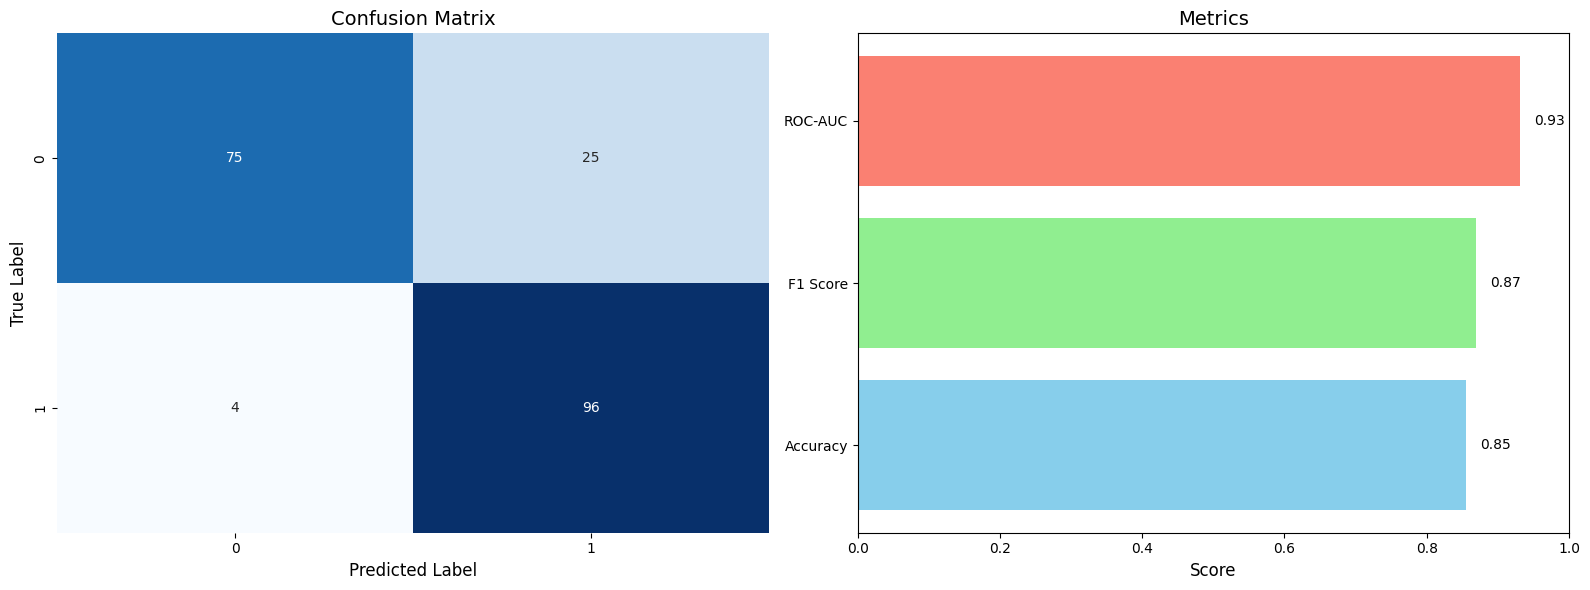

In [13]:
results = evaluate_dataset(data_loader=test_loader, model=model, device=device)
visualize_evaluation_metrics(results, "", savefig=False)